In [141]:
import itertools
import os
from pathlib import Path

import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from dotenv import load_dotenv
from ultralytics import YOLO

from utils.shortcut import get_fake_result
from utils.yolo import crop_by_xyxy, crop_by_two_tooth

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

# %matplotlib inline



In [142]:
model_path = Path(os.getenv('YOLO_MODEL_DIR')) / '8-bound-v8.pt'
# model = torch.hub.load(r'..\YOLO', 'custom', path=model_path, source='local') if model_path.is_file() else None
model = YOLO(model_path)

data_dir = Path(os.getenv('DATASET_DIR')) / 'DENTEX CHALLENGE 2023/validation_data/quadrant_enumeration_disease/xrays'

data_dir


PosixPath('/Users/lucyxu/PycharmProjects/datasets/DENTEX CHALLENGE 2023/validation_data/quadrant_enumeration_disease/xrays')


image 1/1 /Users/lucyxu/PycharmProjects/datasets/DENTEX CHALLENGE 2023/validation_data/quadrant_enumeration_disease/xrays/val_13.png: 288x640 1 13, 1 17, 1 23, 1 27, 1 33, 1 37, 1 43, 1 47, 50.4ms
Speed: 3.4ms preprocess, 50.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/lucyxu/PycharmProjects/datasets/DENTEX CHALLENGE 2023/validation_data/quadrant_enumeration_disease/xrays/val_13.png: 288x640 1 13, 1 17, 1 23, 1 27, 1 33, 1 37, 1 43, 1 47, 40.9ms
Speed: 2.5ms preprocess, 40.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


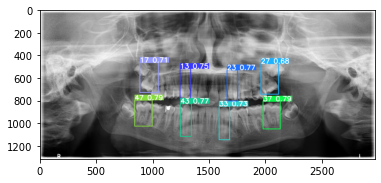

In [143]:
# image_names = list(data_dir.glob('00008026.jpg'))
image_names = list(data_dir.glob('*.png'))

image_name = image_names[0]
filename = image_name.stem

if model:
    results = model(image_name)
    detected_results = model(image_name)
else:
    results = get_fake_result(image_name)
    detected_results = get_fake_result(image_name)

rendered_result = results[0].plot()

plt.imshow(rendered_result)
plt.show()


In [144]:
flag_dict = {
    'upper': [
        '17', '13', '23', '27'
    ],
    'lower': [
        '47', '43', '33', '37'
    ]
}

tooth_number_flag_dict = {
    '1': ('upper', 'left'),
    '2': ('upper', 'right'),
    '3': ('lower', 'right'),
    '4': ('lower', 'left'),
}

tooth_position_dict = {
    0: 'left',
    1: 'middle',
    2: 'right'
}


In [145]:
yolov8 = True
i = 0

images = {}
split_teeth = {}

if yolov8:
    detected_result = detected_results[i]
    file_name = Path(detected_result.path).stem
    bounds = detected_result.boxes.data
    img = detected_result.orig_img
    names = detected_result.names
else:
    file_name = detected_results.files[i][:-4]
    bounds = detected_results.xyxy[i]
    img = detected_results.imgs[i]
    names = detected_results.names

images[file_name] = []
split_teeth[file_name] = {}


In [146]:
tooth_bounds = []
for j in range(len(bounds)):
    x1, y1, x2, y2, _, cls = bounds[j]
    x1, x2 = min(x1, x2), max(x1, x2)
    y1, y2 = min(y1, y2), max(y1, y2)
    xyxy = torch.vstack([x1, y1, x2, y2])

    cls = int(cls.item())
    name = names[cls]
    tooth_bounds.append({'xyxy': xyxy, 'name': name})

tooth_bounds


[{'xyxy': tensor([[ 838.5006],
          [ 796.2024],
          [ 993.7768],
          [1025.0481]]),
  'name': '47'},
 {'xyxy': tensor([[1975.8571],
          [ 806.1575],
          [2127.0886],
          [1050.8158]]),
  'name': '37'},
 {'xyxy': tensor([[1656.2548],
          [ 530.7604],
          [1750.7666],
          [ 803.9216]]),
  'name': '23'},
 {'xyxy': tensor([[1243.3809],
          [ 826.0317],
          [1340.9280],
          [1116.7687]]),
  'name': '43'},
 {'xyxy': tensor([[1240.9641],
          [ 518.2179],
          [1334.0649],
          [ 783.9936]]),
  'name': '13'},
 {'xyxy': tensor([[1586.8395],
          [ 850.1791],
          [1679.7263],
          [1145.1504]]),
  'name': '33'},
 {'xyxy': tensor([[ 884.4173],
          [ 464.6448],
          [1048.5933],
          [ 728.5837]]),
  'name': '17'},
 {'xyxy': tensor([[1956.7177],
          [ 473.9206],
          [2113.8376],
          [ 743.8289]]),
  'name': '27'}]

In [147]:
teeth_dict = {}
for j in range(len(tooth_bounds)):
    xyxy = tooth_bounds[j]['xyxy']
    name = tooth_bounds[j]['name']

    teeth_dict[name] = xyxy

    crop_image = crop_by_xyxy(img, xyxy.int())
    split_teeth[file_name][name] = {'xyxy': xyxy, 'crop_image': crop_image}

split_teeth


{'val_13': {'47': {'xyxy': tensor([[ 838.5006],
           [ 796.2024],
           [ 993.7768],
           [1025.0481]]),
   'crop_image': array([[[108, 108, 108],
           [110, 110, 110],
           [112, 112, 112],
           ...,
           [ 54,  54,  54],
           [ 53,  53,  53],
           [ 52,  52,  52]],
   
          [[110, 110, 110],
           [111, 111, 111],
           [112, 112, 112],
           ...,
           [ 55,  55,  55],
           [ 55,  55,  55],
           [ 55,  55,  55]],
   
          [[110, 110, 110],
           [112, 112, 112],
           [113, 113, 113],
           ...,
           [ 55,  55,  55],
           [ 55,  55,  55],
           [ 55,  55,  55]],
   
          ...,
   
          [[ 80,  80,  80],
           [ 81,  81,  81],
           [ 83,  83,  83],
           ...,
           [116, 116, 116],
           [116, 116, 116],
           [116, 116, 116]],
   
          [[ 81,  81,  81],
           [ 83,  83,  83],
           [ 84,  84,  84],
     

In [148]:
a = itertools.product(('upper', 'lower'), range(len(tooth_bounds)))

tooth_detected_tuples = []
for flag in ('upper', 'lower'):
    flag_list = flag_dict[flag]
    teeth_detected_flag = [f in teeth_dict for f in flag_list]
    tooth_detected_tuples += [
        (flag_list[j], flag_list[j + 1], j, flag)
        for j in range(len(flag_list) - 1)
        if teeth_detected_flag[j] and teeth_detected_flag[j + 1]
    ]

tooth_detected_tuples


[('17', '13', 0, 'upper'),
 ('13', '23', 1, 'upper'),
 ('23', '27', 2, 'upper'),
 ('47', '43', 0, 'lower'),
 ('43', '33', 1, 'lower'),
 ('33', '37', 2, 'lower')]

In [149]:
for left_tooth_number, right_tooth_number, number, flag in tooth_detected_tuples:
    left_tooth = teeth_dict[left_tooth_number]
    right_tooth = teeth_dict[right_tooth_number]

    region = crop_by_two_tooth(left_tooth, right_tooth)

    tooth_position = tooth_position_dict[number]

    save_filename = f'{flag}-{number}-{file_name}'
    save_file = Path(f'./crops/{save_filename}.jpg')

    x1, y1, x2, y2 = region
    im = img[y1:y2, x1:x2]
    # print(f'First ROI process: {save_filename} done.')

    left_padding = (left_tooth[2] - left_tooth[0]) // 2
    right_padding = (right_tooth[2] - right_tooth[0]) // 2
    image_data = {
        'flag': flag,
        'tooth_position': tooth_position,
        'org_file_name': file_name,
        'offset': np.array([region[0], region[1]]),
        'padding': {'left': left_padding, 'right': right_padding},
        'image': im,
        'xyxy': region,
    }

    images[file_name].append(image_data)

images


<ipython-input-149-4abd7c4ed5cb>:16: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  left_padding = (left_tooth[2] - left_tooth[0]) // 2
<ipython-input-149-4abd7c4ed5cb>:17: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  right_padding = (right_tooth[2] - right_tooth[0]) // 2


{'val_13': [{'flag': 'upper',
   'tooth_position': 'left',
   'org_file_name': 'val_13',
   'offset': array([966, 414], dtype=int32),
   'padding': {'left': tensor([82.]), 'right': tensor([46.])},
   'image': array([[[102, 102, 102],
           [101, 101, 101],
           [100, 100, 100],
           ...,
           [101, 101, 101],
           [ 98,  98,  98],
           [ 96,  96,  96]],
   
          [[102, 102, 102],
           [100, 100, 100],
           [ 99,  99,  99],
           ...,
           [102, 102, 102],
           [ 97,  97,  97],
           [ 93,  93,  93]],
   
          [[105, 105, 105],
           [103, 103, 103],
           [100, 100, 100],
           ...,
           [100, 100, 100],
           [ 98,  98,  98],
           [ 97,  97,  97]],
   
          ...,
   
          [[181, 181, 181],
           [177, 177, 177],
           [172, 172, 172],
           ...,
           [ 90,  90,  90],
           [ 89,  89,  89],
           [ 89,  89,  89]],
   
          [[189, 18

/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(x, float)


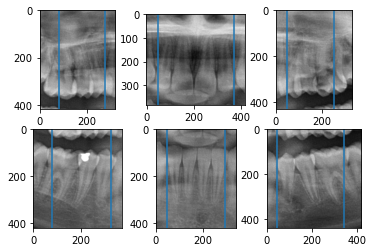

In [150]:
from itertools import product

fig, axes = plt.subplots(ncols=3, nrows=2)

a = product(range(0, 2), range(0, 3))
a = zip(a, range(0, 6))

for ax_index, index in a:
    im_data = images[image_name.stem][index]
    im = im_data['image']
    padding = im_data['padding']
    _, w_im, _ = im.shape

    axes[ax_index].imshow(im)
    axes[ax_index].axvline(padding['left'])
    axes[ax_index].axvline(w_im - padding['right'])

# for i in images[image_name.stem]:
#     im = i['image']
#
#     axes[0][0].imshow(1 - im)
plt.show()


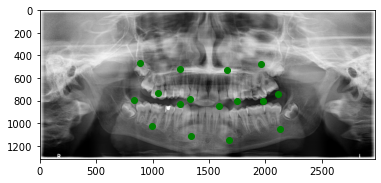

In [151]:
im = cv.imread(image_name)
plt.imshow(im)

for i in teeth_dict.values():
    plt.plot(*i[:2], color='green', marker='o')
    plt.plot(*i[2:], color='green', marker='o')

plt.show()
